# BI-Agent: Automated Multi-Agent Business Intelligence Pipeline



## Capstone Project — Google AI Agents Intensive (Nov 2025)


Desciption  

This project implements a fully automated multi-agent pipeline for business intelligence.

The pipeline includes:
- Data Cleaning Agent
- EDA Agent
- Insight Agent
- Report Builder Agent
- Session Manager + Logging
- Absolute path architecture for reliable reproducibility
- Fully automated report generation

The system processes raw CSV sales data and produces:
- Cleaned dataset
- Statistical summaries
- Visualizations (plots)
- Business insights
- Final report in Markdown

This notebook demonstrates the complete pipeline execution for the sample dataset.


In [20]:
import os

EXCLUDE = {"venv", "__pycache__", ".git", ".ipynb_checkpoints"}

def print_tree(path, prefix=""):
    items = [i for i in os.listdir(path) if i not in EXCLUDE]
    for index, item in enumerate(sorted(items)):
        is_last = index == len(items) - 1
        connector = "└── " if is_last else "├── "
        print(prefix + connector + item)
        full_path = os.path.join(path, item)
        if os.path.isdir(full_path):
            extension = "    " if is_last else "│   "
            print_tree(full_path, prefix + extension)

print_tree("..")


├── .gitignore
├── LICENSE
├── README.md
├── demo_data
│   ├── README.md
│   └── sales_sample.csv
├── docs
│   └── README.md
├── logs
│   ├── 20251115_194254.log.json
│   ├── 20251115_195324.log.json
│   ├── 20251115_201217.log.json
│   ├── 20251115_230315.log.json
│   ├── 20251115_232340.log.json
│   ├── 20251115_232522.log.json
│   └── FINAL_TEST_123.log.json
├── notebooks
│   └── demo_notebook.ipynb
├── outputs
│   ├── README.md
│   ├── cleaned_20251115_192452.csv
│   ├── cleaned_20251115_192744.csv
│   ├── cleaned_20251115_193018.csv
│   ├── cleaned_20251115_193223.csv
│   ├── cleaned_20251115_193458.csv
│   ├── cleaned_20251115_193736.csv
│   ├── cleaned_20251115_194254.csv
│   ├── cleaned_20251115_195324.csv
│   ├── insights_20251115_193019.md
│   ├── insights_20251115_193224.md
│   ├── insights_20251115_193500.md
│   ├── insights_20251115_193738.md
│   ├── insights_20251115_194255.md
│   ├── insights_20251115_195325.md
│   ├── plots
│   │   ├── correlation_heatmap.png
│   │   ├─

In [1]:
import sys, os

# Allow importing modules from src/
sys.path.insert(0, os.path.abspath("../src"))

# Confirm Python path
sys.path[0]


'c:\\Users\\RISHABH GUPTA\\OneDrive\\Desktop\\bi-agent-capstone\\bi-agent-capstone\\src'

In [2]:
from coordinator import Coordinator


In [7]:
c = Coordinator()
report_path = c.run("../demo_data/sales_sample.csv")
report_path


'c:\\Users\\RISHABH GUPTA\\OneDrive\\Desktop\\bi-agent-capstone\\bi-agent-capstone\\sessions\\20251115_232522\\report.md'

In [8]:
normalized = report_path.replace("\\", "/")

import re
match = re.search(r"sessions/([^/]+)/report\.md", normalized)
session_id = match.group(1)
session_id


'20251115_232522'

In [9]:
import json, os

project_root = os.path.abspath("..")
meta_path = os.path.join(project_root, "sessions", session_id, "meta.json")

with open(meta_path, "r") as f:
    meta = json.load(f)

meta


{'session_id': '20251115_232522',
 'file_path': '../demo_data/sales_sample.csv',
 'created_at': '2025-11-15 23:25:22.614233',
 'metrics': {'rows_after_cleaning': 5,
  'columns': 5,
  'missing_before': {'date': 0,
   'region': 0,
   'product': 0,
   'units_sold': 1,
   'price': 1},
  'missing_after': {'date': 0,
   'region': 0,
   'product': 0,
   'units_sold': 0,
   'price': 0},
  'plots_generated': 4,
  'insight_file': 'c:\\Users\\RISHABH GUPTA\\OneDrive\\Desktop\\bi-agent-capstone\\bi-agent-capstone\\sessions\\20251115_232522\\insights.md',
  'report_path': 'c:\\Users\\RISHABH GUPTA\\OneDrive\\Desktop\\bi-agent-capstone\\bi-agent-capstone\\sessions\\20251115_232522\\report.md',
  'total_runtime_seconds': 0.91}}

In [10]:
insights_path = os.path.join(project_root, "sessions", session_id, "insights.md")

with open(insights_path, "r", encoding="utf-8") as f:
    print(f.read())


# Business Insights Report

- Average units sold: **8.50**
- Highest units sold in a single day: **12.0**
- Average price across products: **437.50**
- **Negative correlation** between price and units sold → Lower price tends to increase sales.

### Plot Insights
Generated plots show potential sales trends and distribution patterns.

### Included Plots:
- c:\Users\RISHABH GUPTA\OneDrive\Desktop\bi-agent-capstone\bi-agent-capstone\sessions\20251115_232522\plots\correlation_heatmap.png
- c:\Users\RISHABH GUPTA\OneDrive\Desktop\bi-agent-capstone\bi-agent-capstone\sessions\20251115_232522\plots\units_sold_distribution.png
- c:\Users\RISHABH GUPTA\OneDrive\Desktop\bi-agent-capstone\bi-agent-capstone\sessions\20251115_232522\plots\price_distribution.png
- c:\Users\RISHABH GUPTA\OneDrive\Desktop\bi-agent-capstone\bi-agent-capstone\sessions\20251115_232522\plots\units_sold_trend.png



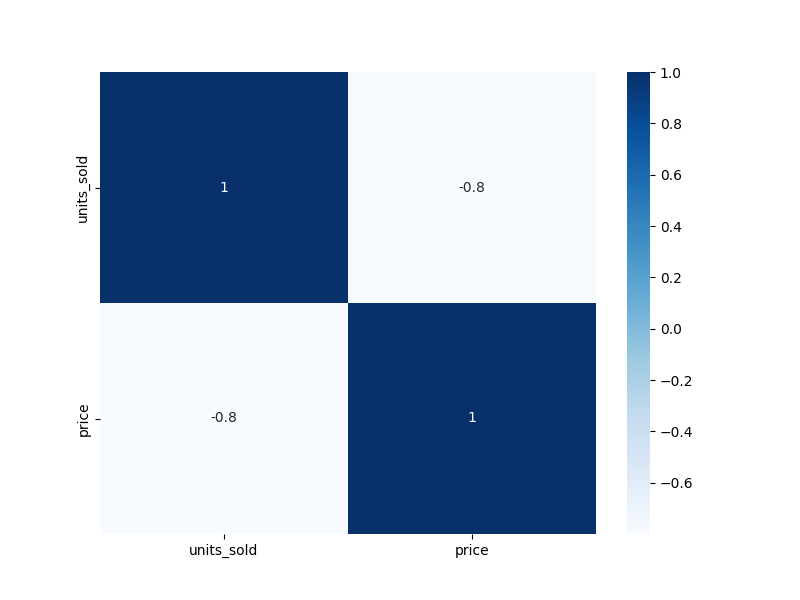

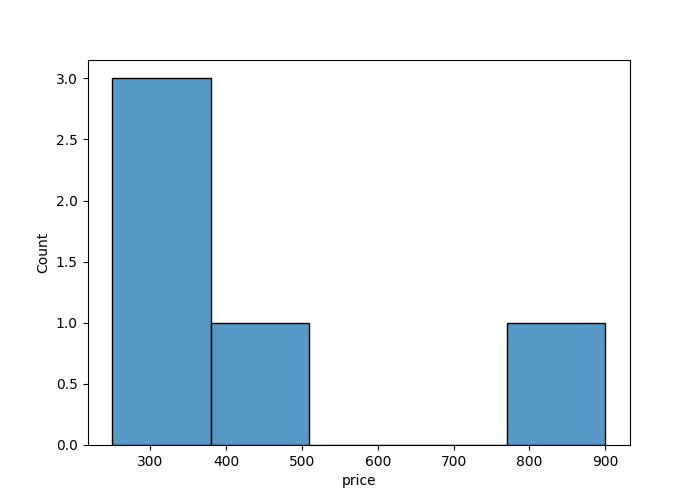

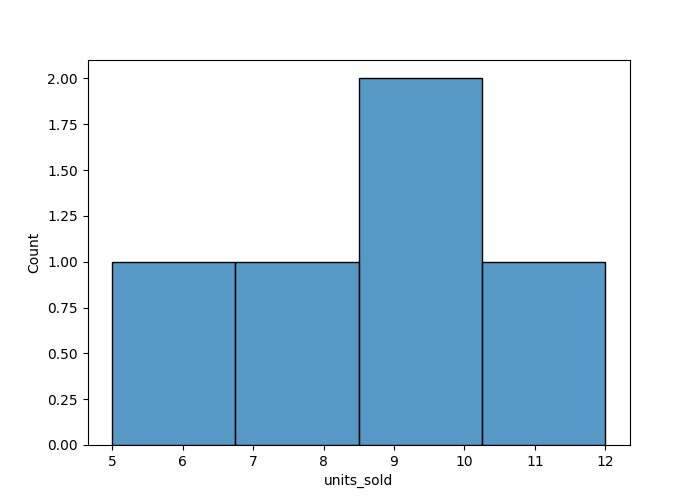

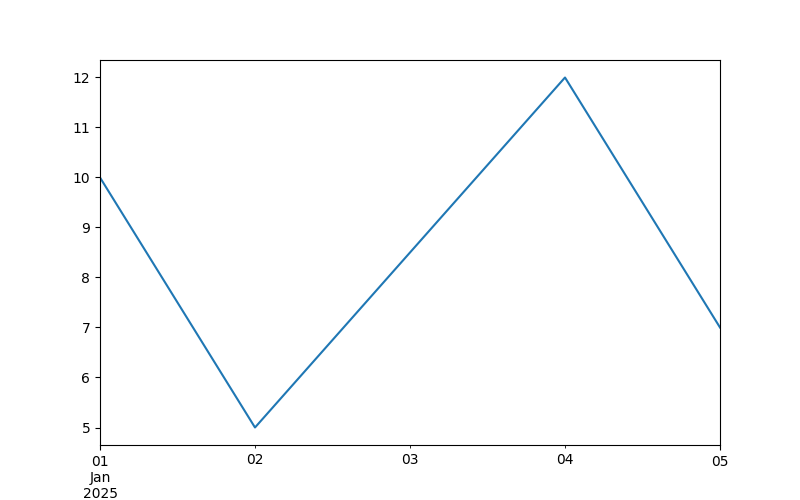

In [11]:
from IPython.display import Image, display

plot_folder = os.path.join(project_root, "sessions", session_id, "plots")

for filename in os.listdir(plot_folder):
    display(Image(filename=os.path.join(plot_folder, filename)))


In [12]:
report_file = os.path.join(project_root, normalized)
with open(report_file, "r", encoding="utf-8") as f:
    print(f.read())


# BI Analysis Report — Session 20251115_232522

## 1. Overview
- Total rows after cleaning: **5**
- Total columns: **5**

## 2. Summary Statistics
```
                       date region product  units_sold       price
count                     5      5       5    5.000000    5.000000
unique                  NaN      4       3         NaN         NaN
top                     NaN  North   Phone         NaN         NaN
freq                    NaN      2       2         NaN         NaN
mean    2025-01-03 00:00:00    NaN     NaN    8.500000  437.500000
min     2025-01-01 00:00:00    NaN     NaN    5.000000  250.000000
25%     2025-01-02 00:00:00    NaN     NaN    7.000000  300.000000
50%     2025-01-03 00:00:00    NaN     NaN    8.500000  300.000000
75%     2025-01-04 00:00:00    NaN     NaN   10.000000  437.500000
max     2025-01-05 00:00:00    NaN     NaN   12.000000  900.000000
std                     NaN    NaN     NaN    2.692582  267.803566
```

## 3. Business Insights
- Average units 

In [13]:
import os

print("ROOT sessions:", os.listdir("../sessions"))
print("ROOT outputs:", os.listdir("../outputs"))
print("ROOT logs:", os.listdir("../logs"))

print("NOTEBOOK sessions exists?", os.path.exists("sessions"))
print("NOTEBOOK outputs exists?", os.path.exists("outputs"))
print("NOTEBOOK logs exists?", os.path.exists("logs"))


ROOT sessions: ['20251115_193736', '20251115_194254', '20251115_195324', '20251115_201217', '20251115_230315', '20251115_232340', '20251115_232522']
ROOT outputs: ['cleaned_20251115_192452.csv', 'cleaned_20251115_192744.csv', 'cleaned_20251115_193018.csv', 'cleaned_20251115_193223.csv', 'cleaned_20251115_193458.csv', 'cleaned_20251115_193736.csv', 'cleaned_20251115_194254.csv', 'cleaned_20251115_195324.csv', 'insights_20251115_193019.md', 'insights_20251115_193224.md', 'insights_20251115_193500.md', 'insights_20251115_193738.md', 'insights_20251115_194255.md', 'insights_20251115_195325.md', 'plots', 'README.md', 'report_20251115_193500.md', 'report_20251115_193738.md', 'report_20251115_194255.md', 'report_20251115_195325.md']
ROOT logs: ['20251115_194254.log.json', '20251115_195324.log.json', '20251115_201217.log.json', '20251115_230315.log.json', '20251115_232340.log.json', '20251115_232522.log.json', 'FINAL_TEST_123.log.json']
NOTEBOOK sessions exists? False
NOTEBOOK outputs exists? 